In [1]:
# %matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.stats import mode
from statsmodels.robust import mad
from numpy.random import normal

# Include the utils functions
import os
import sys
sys.path.insert(0, os.path.abspath('./'))
from utils import *

import warnings
warnings.filterwarnings('ignore')

boxcar_window_size = 3001
matched_filter_window_length = (3000./3600)
matched_filter_depth = 1./np.pi
matched_filter_fwhm = 1./3600
detection_threshold = 5.
matched_filter_num_fwhm = 15

dr="/Users/bjackson/Downloads/ps_bundle/data_calibrated"

aspect_ratio = 16./9 # On HD projectors nowadays, this is the aspect ratio.
                     # so I make my figures using that ratio so they show up nicely in presentations.
BoiseState_blue = "#0033A0"
BoiseState_orange = "#D64309"

476.0
0.13307 0.2084205 0.562825
66.0
395.0
30.0
[0.510427]


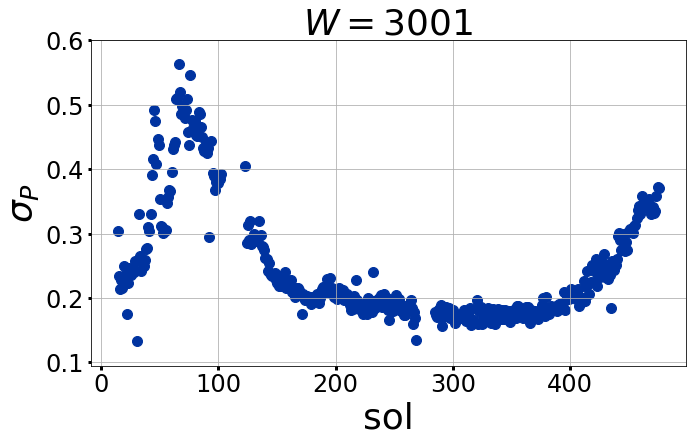

In [4]:
# 2020 Aug 5 - Cycle through all available sols and figure out which ones have the largest and smallest scatters
sols = range(14, 477)

new_filename = "filtered_pressure_scatter.csv"
# f = open(new_filename, "w")
# f.write("# sol, scatter\n")

# stds = np.array([])
# for cur_sol in sols:
# for cur_sol in [66]:
#     try:
#         LTST, LTST_and_sol, sol_data = retrieve_pressure_data(cur_sol, dr=dr)

#         pressure_filter, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)
#     pressure_filter = savgol_filter(sol_data["PRESSURE"], boxcar_window_size, 0, mode='interp')

#         plt.plot(LTST_and_sol, (sol_data["PRESSURE"] - pressure_filter), marker='.', ls='')
#         plt.plot(LTST_and_sol, sol_data["PRESSURE"], marker='.', ls='')
#         plt.plot(LTST_and_sol, pressure_filter, marker='.', ls='')
    
#     plt.plot(LTST_and_sol[ind], np.ones_like(LTST_and_sol[ind])*np.nanmedian(sol_data["PRESSURE"]), marker='o')
#         plt.plot(LTST_and_sol, pressure_filter, marker='.', ls='')

#     cur_std = np.nanstd(sol_data['PRESSURE'] - pressure_filter)
#     write_str = "%i, %g" % (cur_sol, cur_std)
#     print(write_str)
#         f.write(write_str + "\n")

#         stds = np.append(stds, cur_std)

#     except:
#         print(cur_sol)
#         pass

# f.close()

data = np.genfromtxt(new_filename, delimiter=',', comments='#', names=True)

fig = plt.figure(figsize=(6*aspect_ratio, 6))
ax = fig.add_subplot(111)
ax.scatter(data['sol'], data['scatter'], color=BoiseState_blue, s=100)

print(data['sol'][-1])

ax.grid(True)
ax.set_title(r'$W = $%i' % boxcar_window_size, fontsize=36)
ax.set_xlabel("sol", fontsize=36)
ax.set_ylabel(r'$\sigma_P$', fontsize=36)
ax.tick_params(labelsize=24)

print(np.min(data['scatter']), np.median(data['scatter']), np.max(data['scatter']))
print(data['sol'][np.argmax(data['scatter'])])
print(data['sol'][np.argmin(np.abs(data['scatter'] - np.median(data['scatter'])))])
print(data['sol'][np.argmin(data['scatter'])])
print(data['scatter'][data['sol'] == 65])

max_sol = int(data['sol'][np.argmax(data['scatter'])])
med_sol = int(data['sol'][np.argmin(np.abs(data['scatter'] - np.median(data['scatter'])))])
min_sol = int(data['sol'][np.argmin(data['scatter'])])

# fig.savefig(new_filename.replace("csv", "png"), dpi=500, bbox_inches='tight')

0.9843920333989177


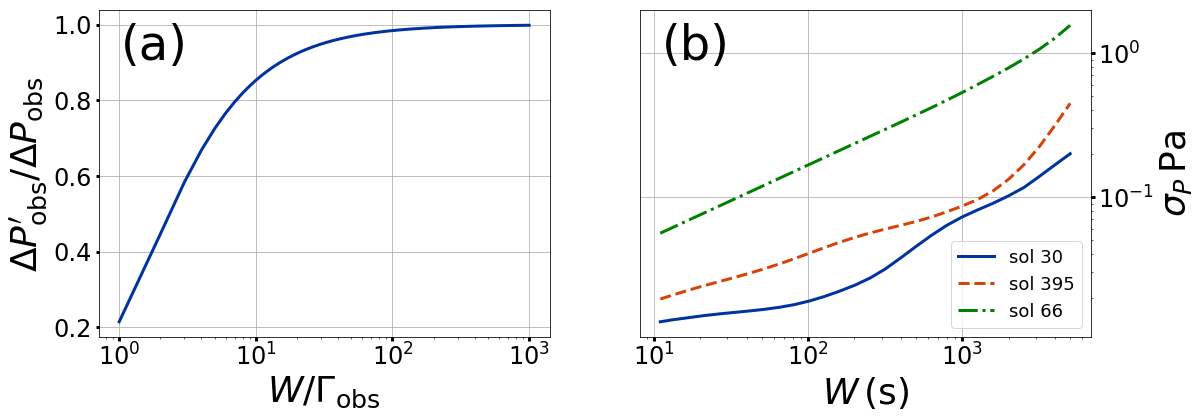

In [14]:
fig = plt.figure(figsize=(10*aspect_ratio, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
# plt.setp(ax2.get_yticklabels(), visible=False)

# This calculation reflects the change in Delta P from the Savitsky-Golay filter

x = np.linspace(1, 1000, 1000)
f = 1. - np.arctan(x)/x
ax1.semilogx(x, f, color=BoiseState_blue, lw=3)
print(f[np.argmin(np.abs(x - 100.))])

ax1.set_xlabel(r'$W/\Gamma_{\rm obs}$', fontsize=36)
ax1.set_ylabel(r'$\Delta P_{\rm obs}^\prime/\Delta P_{\rm obs}$', fontsize=36)
ax1.grid(True)
ax1.tick_params(labelsize=24)
ax1.text(0.05, 0.85, "(a)", fontsize=48, transform=ax1.transAxes)

### (b) ###

sol = min_sol
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol

delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])
min_window_size = np.log10(10./3600)
max_window_size = np.log10(5000./3600)
window_lengths_int = np.ceil((10**(np.arange(min_window_size, max_window_size + 0.1, 0.1))/delta_t)) // 2 * 2 + 1 
window_lengths = window_lengths_int*delta_t*3600.

stds = np.array([])
for i in range(len(window_lengths)):
    pressure_filter = savgol_filter(sol_data['PRESSURE'], window_lengths_int[i], 0, mode='nearest')
    stds = np.append(stds, np.std(sol_data['PRESSURE'] - pressure_filter))
ax2.loglog(window_lengths, stds, color=BoiseState_blue, lw=3, label="sol %i" % min_sol)

sol = med_sol
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol
stds = np.array([])
for i in range(len(window_lengths)):
    pressure_filter = savgol_filter(sol_data['PRESSURE'], window_lengths_int[i], 0, mode='nearest')
    stds = np.append(stds, np.std(sol_data['PRESSURE'] - pressure_filter))
ax2.loglog(window_lengths, stds, color=BoiseState_orange, lw=3, ls='--', label="sol %i" % med_sol)

sol = max_sol
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr, nans_in_gaps=False)
LTST_and_sol -= 24.*sol
stds = np.array([])
for i in range(len(window_lengths)):
    pressure_filter = savgol_filter(sol_data['PRESSURE'], window_lengths_int[i], 0, mode='nearest')
    stds = np.append(stds, np.std(sol_data['PRESSURE'] - pressure_filter))
ax2.loglog(window_lengths, stds, color='green', lw=3, ls='-.', label="sol %i" % max_sol)

ax2.legend(loc="lower right", fontsize=18)

ax2.set_xlabel(r'$W\,\left( {\rm s} \right)$', fontsize=36)
ax2.set_ylabel(r'$\sigma_P\,{\rm Pa}$', fontsize=36)
ax2.grid(True)
ax2.tick_params(labelsize=24)
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.text(0.05, 0.85, "(b)", fontsize=48, transform=ax2.transAxes)
 
# fig.savefig("../figures/Pobsprime-sigmaP_vs_W.png", dpi=500, bbox_inches="tight")

[]


ValueError: attempt to get argmin of an empty sequence

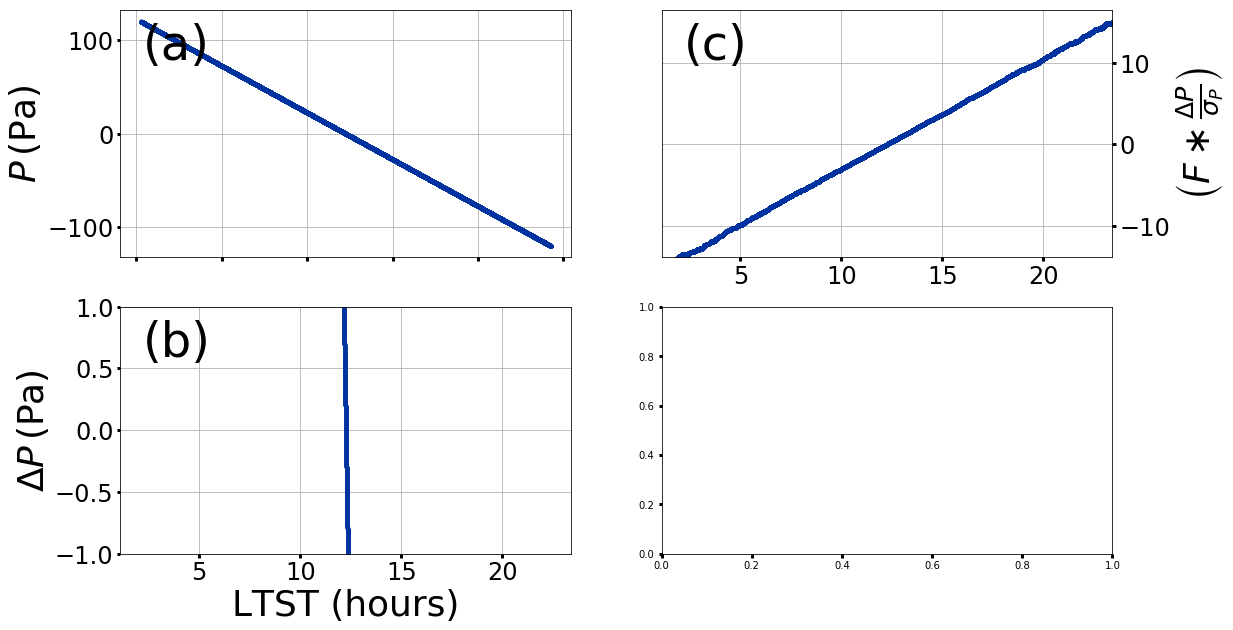

In [9]:
# The sol with the deepest vortex, as reported by Spiga et al. (2020)
# sol = 65
sol = 323
LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol
    
delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])

# Generate synthetic data
baseline = 0.
slope = -10.
t0 = np.median(LTST_and_sol)
sol_data['PRESSURE'] = modified_lorentzian(LTST_and_sol, 
baseline, slope, t0, matched_filter_depth, matched_filter_fwhm) +\
    normal(scale=matched_filter_depth/5., size=LTST_and_sol.shape)

fig = plt.figure(figsize=(10*aspect_ratio, 10))

### Raw Data ###

ind = (LTST_and_sol > np.min(LTST_and_sol) + boxcar_window_size*delta_t) &\
        (LTST_and_sol < np.max(LTST_and_sol) - boxcar_window_size*delta_t)

ax1 = fig.add_subplot(221)
ax1.plot(LTST_and_sol, sol_data['PRESSURE'], marker='.', ls='', color=BoiseState_blue)
ax1.text(0.05, 0.8, "(a)", fontsize=48, transform=ax1.transAxes)
ax1.grid(True)
ax1.tick_params(labelsize=24, labelbottom=False)
ax1.set_ylabel(r'$P\,\left({\rm Pa}\right)$', fontsize=36)

### Filtered Data ###

ax2 = fig.add_subplot(223)
filtered_pressure, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)

ax2.plot(LTST_and_sol, filtered_pressure, marker='.', ls='', color=BoiseState_blue)
ax2.text(0.05, 0.8, "(b)", fontsize=48, transform=ax2.transAxes)
ax2.grid(True)
ax2.tick_params(labelsize=24)
ax2.set_xlabel("LTST (hours)", fontsize=36)
ax2.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

ax2.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
# ax2.set_ylim([0.9*np.min(filtered_pressure[ind]), 1.1*np.max(filtered_pressure[ind])])
ax2.set_ylim([-1, 1])

### Matched Filter ###

# Convolve with Lorentzian

convolution = apply_lorentzian_matched_filter(LTST_and_sol, filtered_pressure, st, 
                                              matched_filter_fwhm, matched_filter_depth, boxcar_window_size)
med = np.nanmedian(convolution)
md = mad(convolution)

ax3 = fig.add_subplot(222)
ax3.plot(LTST_and_sol, convolution, color=BoiseState_blue, ls='', marker='.')
ax3.axhline(med + detection_threshold*md, color=BoiseState_orange, ls='--', lw=6, zorder=-1)
ax3.text(0.05, 0.8, "(c)", fontsize=48, transform=ax3.transAxes)
ax3.grid(True)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.tick_params(labelsize=24, labelleft=False, labelright=True)

ax3.set_ylabel(r'$\left( F \ast \frac{\Delta P}{\sigma_P} \right)$', fontsize=36)
# ax3.set_xlabel("LTST (hours)", fontsize=36)
ax3.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
ax3.set_ylim([0.9*np.min(convolution[ind]), 1.1*np.max(convolution[ind])])

### Fit Vortex ###
ax4 = fig.add_subplot(224)

ex, pk_wds = find_vortices(LTST_and_sol, convolution, detection_threshold=detection_threshold)
print(ex)
for cur_ex in ex:
    ax2.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    ax3.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    
# Take largest one
# mx_ind = np.argmax(convolution[ex])
mx_ind = np.argmin(convolution[ex])
# mx_ind = np.argmin(np.abs(convolution[ex] - np.median(convolution[ex])))
# mx_ind = 7
mx_width = int(pk_wds[mx_ind])

# Use original, unfiltered data
vortex = np.array([LTST_and_sol[ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                ex[mx_ind] + matched_filter_num_fwhm*mx_width], 
                   sol_data['PRESSURE'][ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                        ex[mx_ind] + matched_filter_num_fwhm*mx_width]])

errs = st[ex[mx_ind] - matched_filter_num_fwhm*mx_width: ex[mx_ind] + matched_filter_num_fwhm*mx_width]

init_params = determine_init_params(vortex)
bounds = determine_bounds(vortex, init_params)

popt, uncertainties = fit_vortex(vortex, init_params, bounds, rescale_uncertainties=True, zoomed_in=None)

ax4.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], yerr=errs, ls='', marker='o', color=BoiseState_blue)
ax4.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
         lw=3, color=BoiseState_orange, zorder=-1)

ax4.text(0.05, 0.05, "(d)", fontsize=48, transform=ax4.transAxes)
ax4.text(0.525, 0.1, ("$\\Delta P_{\\rm obs} = $(%.2g$\\pm$%.1g) Pa \n $\\Gamma_{\\rm obs} = $(%.2g$\\pm$%.1g) s" %\
                       (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600)), 
         fontsize=20, transform=ax4.transAxes)
ax4.grid(True)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.tick_params(labelsize=24, labelleft=False, labelright=True)
ax4.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
ax4.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

print((np.max(convolution[ex]) - med)/md)

# fig.savefig("../figures/data_conditioning_and_fit.png", dpi=500, bbox_inches='tight')

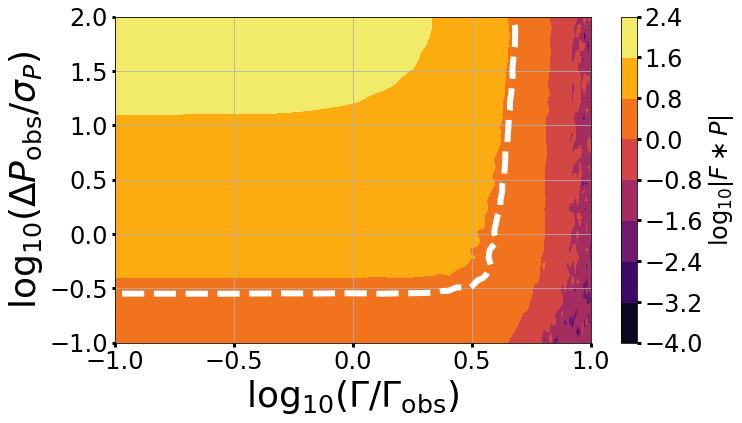

In [12]:
# sol = 65
sol = 323
# LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
# LTST_and_sol -= 24.*sol
    
delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])

# Generate synthetic data
baseline = 0.
slope = 0.
t0 = np.median(LTST_and_sol)

time = np.arange(-20.*matched_filter_fwhm, 20.*matched_filter_fwhm, delta_t) + t0

num_factors = 50
num_simulations = 200
noise_factors = 10**(np.linspace(2.2, -1.5, num_factors))
width_factors = np.linspace(0.1, 10., num_factors)

# recovery = np.zeros([num_simulations, num_factors, num_factors])
# for i in range(num_simulations):
#     for j in range(num_factors):
#         for k in range(num_factors):
#             data = modified_lorentzian(time, baseline, slope, t0, matched_filter_depth, matched_filter_fwhm) +\
#             normal(scale=matched_filter_depth/noise_factors[k], size=time.shape)
            
#             convolution =\
#                 apply_lorentzian_matched_filter(time, data, matched_filter_depth/noise_factors[k], 
#                                                 matched_filter_fwhm*width_factors[j], matched_filter_depth)
#             # What convolution do you get for the peak?
#             ind = np.argmin(np.abs(time - t0))
            
#             med = np.median(convolution)
#             md = mad(convolution)
#             recovery[i,j,k] = (convolution[ind] - med)/md
            
X, Y = np.meshgrid(np.log10(width_factors), np.log10(noise_factors))
fig = plt.figure(figsize=(6*aspect_ratio, 6))
# ax = fig.add_subplot(111)

# cp = ax.contourf(X, Y, np.log10(np.mean(recovery, axis=0)))
# fig.colorbar(cp) # Add a colorbar to a plot

CS = plt.contour(X, Y, np.log10(np.abs(np.mean(recovery, axis=0))), 
                 levels = [np.log10(5)], linewidths=(6,), colors=('white'), linestyles=("--"))
# CS = plt.contourf(X, Y, np.log10(np.mean(recovery, axis=0)), 
#                   np.array([np.log10(1), np.log10(3), np.log10(5), 
#                             np.log10(10), np.log10(30), np.log10(50), 
#                             np.log10(100), np.log10(300)]), cmap='inferno')
CS = plt.contourf(X, Y, np.log10(np.abs(np.mean(recovery, axis=0))), cmap='inferno')

CB = plt.colorbar(CS, extend='both')
CB.ax.tick_params(labelsize=24) 
CB.set_label(r'$\log_{10} | F\ast P |$', fontsize=24)
plt.ylim([-1, 2])

plt.tick_params(labelsize=24)
plt.xlabel(r'$\log_{10} \left( \Gamma/\Gamma_{\rm obs} \right)$', fontsize=36)
plt.ylabel(r'$\log_{10} \left( \Delta P_{\rm obs}/\sigma_P \right)$', fontsize=36)

plt.grid(True)

# plt.semilogx(1/noise_factors, np.mean(recovery[:,:,0], axis=0))
# plt.semilogx(matched_filter_depth/noise_factors, np.mean(recovery[:,:,1], axis=0))
# plt.semilogx(matched_filter_depth/noise_factors, np.mean(recovery[:,:,2], axis=0))

# sol_data['PRESSURE'] = modified_lorentzian(LTST_and_sol, 
#                                            baseline, slope, t0, matched_filter_depth, matched_filter_fwhm) +\
#     normal(scale=matched_filter_depth/5., size=LTST_and_sol.shape)

fig.savefig("../figures/vortex_recovery.png", dpi=500, bbox_inches="tight")

395
11.618632619452177


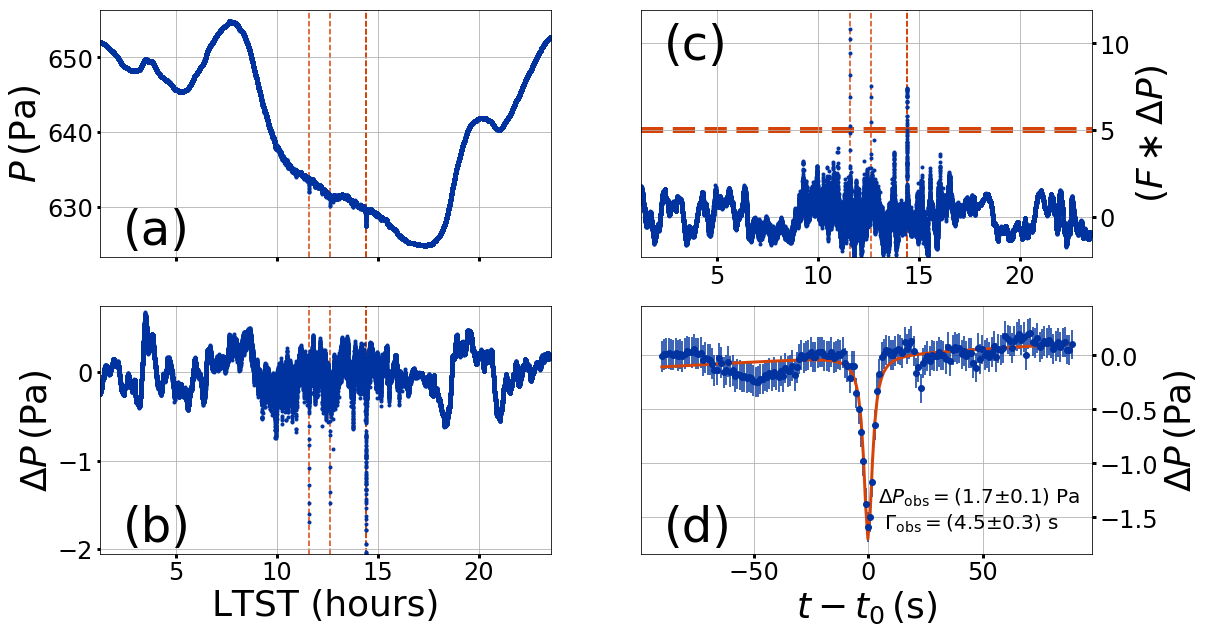

In [33]:
# The sol with the deepest vortex, as reported by Spiga et al. (2020)
# sol = 65
# sol = 323
sol = med_sol

print(sol)

LTST, LTST_and_sol, sol_data = retrieve_pressure_data(sol, dr=dr)
LTST_and_sol -= 24.*sol
    
delta_t = np.max(LTST_and_sol[1:] - LTST_and_sol[0:-1])

fig = plt.figure(figsize=(10*aspect_ratio, 10))

### Raw Data ###

ind = (LTST_and_sol > np.min(LTST_and_sol) + boxcar_window_size*delta_t) &\
        (LTST_and_sol < np.max(LTST_and_sol) - boxcar_window_size*delta_t)

ax1 = fig.add_subplot(221)
ax1.plot(LTST_and_sol, sol_data['PRESSURE'], marker='.', ls='', color=BoiseState_blue)
ax1.text(0.05, 0.05, "(a)", fontsize=48, transform=ax1.transAxes)
ax1.grid(True)
ax1.tick_params(labelsize=24, labelbottom=False)
ax1.set_ylabel(r'$P\,\left({\rm Pa}\right)$', fontsize=36)

### Filtered Data ###

ax2 = fig.add_subplot(223, sharex=ax1)

pressure_filter, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)
filtered_pressure = sol_data["PRESSURE"] - pressure_filter

ax2.plot(LTST_and_sol, filtered_pressure, marker='.', ls='', color=BoiseState_blue)
ax2.text(0.05, 0.05, "(b)", fontsize=48, transform=ax2.transAxes)
ax2.grid(True)
ax2.tick_params(labelsize=24)
ax2.set_xlabel("LTST (hours)", fontsize=36)
ax2.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

ax2.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
ax2.set_ylim([0.9*np.min(filtered_pressure[ind]), 1.1*np.max(filtered_pressure[ind])])
# ax2.set_ylim([-1, 1])

### Matched Filter ###

# Convolve with Lorentzian

convolution = apply_lorentzian_matched_filter(LTST_and_sol, filtered_pressure, st, 
                                                      matched_filter_fwhm, matched_filter_depth, boxcar_window_size)
med = np.median(convolution)
md = mad(convolution)

convolution -= med
convolution /= md

ax3 = fig.add_subplot(222)
ax3.plot(LTST_and_sol, convolution, color=BoiseState_blue, ls='', marker='.')
ax3.axhline(detection_threshold, color=BoiseState_orange, ls='--', lw=6, zorder=-1)
ax3.text(0.05, 0.8, "(c)", fontsize=48, transform=ax3.transAxes)
ax3.grid(True)
ax3.yaxis.set_label_position("right")
ax3.yaxis.tick_right()
ax3.tick_params(labelsize=24, labelleft=False, labelright=True)

ax3.set_ylabel(r'$\left( F \ast \Delta P \right)$', fontsize=36)
# ax3.set_xlabel("LTST (hours)", fontsize=36)
ax3.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
# ax3.set_xlim([8., 10.])
ax3.set_ylim([0.9*np.min(convolution[ind]), 1.1*np.max(convolution[ind])])

### Fit Vortex ###
ax4 = fig.add_subplot(224)

ex, pk_wds = find_vortices(LTST_and_sol, convolution, detection_threshold=detection_threshold)
for cur_ex in ex:
    ax1.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    ax2.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    ax3.axvline(LTST_and_sol[cur_ex], color=BoiseState_orange, zorder=-1, ls='--')
    
# Take largest one
mx_ind = np.argmax(convolution[ex])

# Take the smallest one
# mx_ind = np.argmin(convolution[ex])

# mx_ind = np.argmin(np.abs(convolution[ex] - np.median(convolution[ex])))
# mx_ind = 7
mx_width = np.max([2, int(pk_wds[mx_ind])])

# Use original, unfiltered data
vortex = np.array([LTST_and_sol[ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                ex[mx_ind] + matched_filter_num_fwhm*mx_width], 
                   sol_data['PRESSURE'][ex[mx_ind] - matched_filter_num_fwhm*mx_width:
                                        ex[mx_ind] + matched_filter_num_fwhm*mx_width]])

errs = st[ex[mx_ind] - matched_filter_num_fwhm*mx_width: ex[mx_ind] + matched_filter_num_fwhm*mx_width]

init_params = determine_init_params(vortex)
bounds = determine_bounds(vortex, init_params)

popt, uncertainties = fit_vortex(vortex, init_params, bounds, rescale_uncertainties=True, zoomed_in=None)
print(popt[2])

ax4.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], 
             yerr=errs, ls='', marker='o', color=BoiseState_blue)
ax4.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
         lw=3, color=BoiseState_orange)

# ax4.text(0.05, 0.05, "(d), %g" % matched_filter_num_fwhm, fontsize=48, transform=ax4.transAxes)
ax4.text(0.05, 0.05, "(d)", fontsize=48, transform=ax4.transAxes)
ax4.text(0.525, 0.1, ("$\\Delta P_{\\rm obs} = $(%.1f$\\pm$%.1f) Pa \n $\\Gamma_{\\rm obs} = $(%.1f$\\pm$%.1f) s" %\
                       (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600)), 
         fontsize=20, transform=ax4.transAxes)
ax4.grid(True)
ax4.yaxis.set_label_position("right")
ax4.yaxis.tick_right()
ax4.tick_params(labelsize=24, labelleft=False, labelright=True)
ax4.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
ax4.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

fig.savefig("../figures/data_conditioning_and_fit.png", dpi=500, bbox_inches='tight')

['/Users/bjackson/Downloads/ps_bundle/data_calibrated/sol_0000_0122/ps_calib_0115_02.csv']


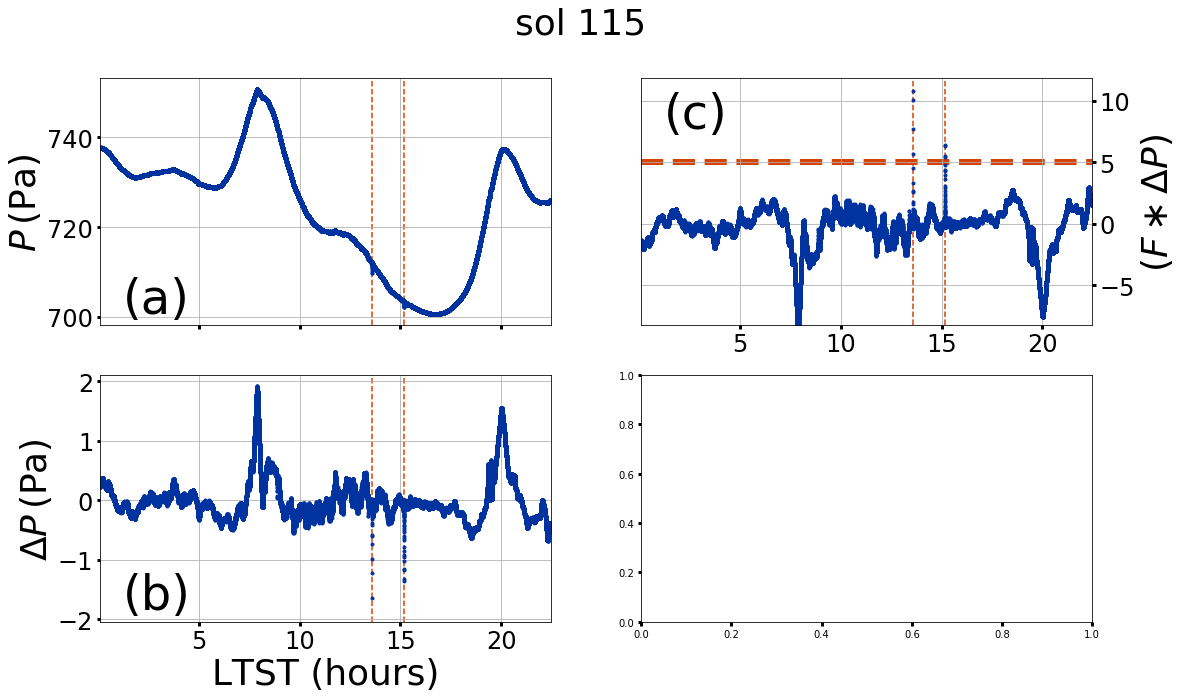

In [17]:
# 2020 Aug 8 - Next find all the vortices

# plt.ioff() # turn off showing plot

new_filename = "all_vortices_2020Aug9.csv"
# f = open(new_filename, "w")
f = open(new_filename, "a")
# f.write("# vortex_number, sol, t0, t0_unc, DeltaP, DeltaP_unc, Gamma, Gamma_unc, "+\
#         "intercept, intercept_unc, slope, slope_inc, convolution\n")

failed_filename = "all_the_sols_we_cannot_see_2020Aug9.txt"
sols = np.genfromtxt(failed_filename, dtype='i', comments="#")
ff = open(failed_filename, "a")

# sols = range(14, 477)
# sols = range(21, 23)

# for cur_sol in sols[2:3]:
for cur_sol in sols:
# for cur_sol in [115]:
    
    try:

        LTST, LTST_and_sol, sol_data = retrieve_pressure_data(cur_sol, dr=dr)
        LTST_and_sol -= 24.*cur_sol

        delta_ts = (LTST_and_sol[1:] - LTST_and_sol[0:-1])
        ind = delta_ts > 0.
        delta_t = mode(delta_ts[ind])[0][0]

        fig = plt.figure(figsize=(10*aspect_ratio, 10))
        fig.suptitle("sol " + str(cur_sol), fontsize=36)

        ### Raw Data ###

        ind = (LTST_and_sol > np.min(LTST_and_sol) + boxcar_window_size*delta_t) &\
                (LTST_and_sol < np.max(LTST_and_sol) - boxcar_window_size*delta_t)

        ax1 = fig.add_subplot(221)
        ax1.plot(LTST_and_sol, sol_data['PRESSURE'], marker='.', ls='', color=BoiseState_blue)
        ax1.text(0.05, 0.05, "(a)", fontsize=48, transform=ax1.transAxes)
        ax1.grid(True)
        ax1.tick_params(labelsize=24, labelbottom=False)
        ax1.set_ylabel(r'$P\,\left({\rm Pa}\right)$', fontsize=36)

        ### Filtered Data ###

        ax2 = fig.add_subplot(223, sharex=ax1)

        pressure_filter, st = boxcar_filter(LTST, LTST_and_sol, sol_data, boxcar_window_size)
        filtered_pressure = sol_data["PRESSURE"] - pressure_filter

        ax2.plot(LTST_and_sol, filtered_pressure, marker='.', ls='', color=BoiseState_blue)
        ax2.text(0.05, 0.05, "(b)", fontsize=48, transform=ax2.transAxes)
        ax2.grid(True)
        ax2.tick_params(labelsize=24)
        ax2.set_xlabel("LTST (hours)", fontsize=36)
        ax2.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

        ax2.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
        ax2.set_ylim([0.9*np.min(filtered_pressure[ind]), 1.1*np.max(filtered_pressure[ind])])
        # ax2.set_ylim([-1, 1])

        ### Matched Filter ###

        # Convolve with Lorentzian

        convolution = apply_lorentzian_matched_filter(LTST_and_sol, filtered_pressure, st, 
                                                      matched_filter_fwhm, matched_filter_depth, boxcar_window_size)
        med = np.median(convolution)
        md = mad(convolution)

        convolution -= med
        convolution /= md

        ax3 = fig.add_subplot(222)
        ax3.plot(LTST_and_sol, convolution, color=BoiseState_blue, ls='', marker='.')
        ax3.axhline(detection_threshold, color=BoiseState_orange, ls='--', lw=6, zorder=-1)
        ax3.text(0.05, 0.8, "(c)", fontsize=48, transform=ax3.transAxes)
        ax3.grid(True)
        ax3.yaxis.set_label_position("right")
        ax3.yaxis.tick_right()
        ax3.tick_params(labelsize=24, labelleft=False, labelright=True)

        ax3.set_ylabel(r'$\left( F \ast \Delta P \right)$', fontsize=36)
        # ax3.set_xlabel("LTST (hours)", fontsize=36)
        ax3.set_xlim([np.min(LTST_and_sol[ind]), np.max(LTST_and_sol[ind])])
        # ax3.set_xlim([8., 10.])
        ax3.set_ylim([0.9*np.min(convolution[ind]), 1.1*np.max(convolution[ind])])

        ### Fit Vortex ###
        ax4 = fig.add_subplot(224)

        ex, pk_wds = find_vortices(LTST_and_sol, convolution, detection_threshold=detection_threshold)

        if(len(ex) > 0):

            # Make a new directory
            new_dir_name = "data_conditioning_figures/sol_" + str(cur_sol)
            if not os.path.exists(new_dir_name):
                os.mkdir(new_dir_name)

            # Sort vortices from weakest to strongest
            srt = np.argsort(convolution[ex])
            srt_ex = ex[srt]
            srt_pk_wds = pk_wds[srt]

            for i in range(len(srt_ex)):
                mx_width = np.max([2, int(srt_pk_wds[i])])

                ax1.axvline(LTST_and_sol[srt_ex[i]], color=BoiseState_orange, zorder=-1, ls='--')
                ax2.axvline(LTST_and_sol[srt_ex[i]], color=BoiseState_orange, zorder=-1, ls='--')
                ax3.axvline(LTST_and_sol[srt_ex[i]], color=BoiseState_orange, zorder=-1, ls='--')

            # Use original, unfiltered data
                vortex = np.array([LTST_and_sol[srt_ex[i] - matched_filter_num_fwhm*mx_width:
                                                srt_ex[i] + matched_filter_num_fwhm*mx_width], 
                                   sol_data['PRESSURE'][srt_ex[i] - matched_filter_num_fwhm*mx_width:
                                                        srt_ex[i] + matched_filter_num_fwhm*mx_width]])

                errs = st[srt_ex[i] - matched_filter_num_fwhm*mx_width: srt_ex[i] + matched_filter_num_fwhm*mx_width]

                init_params = determine_init_params(vortex)
                bounds = determine_bounds(vortex, init_params)

                popt, uncertainties = fit_vortex(vortex, init_params, bounds, rescale_uncertainties=True, zoomed_in=None)

                write_str = "%i, %i, %g, %g, %g, %g, %g, %g, %g, %g, %g, %g, %g" %\
                    (i, cur_sol, popt[2], uncertainties[2], popt[3], uncertainties[3], 
                     popt[4]*3600., uncertainties[4]*3600, 
                     popt[0], uncertainties[0], popt[1], uncertainties[1], convolution[srt_ex[i]],)
                print(write_str)
                f.write(write_str + "\n")

                fig2 = plt.figure(figsize=(10*aspect_ratio, 10))
                fig2.suptitle("sol " + str(cur_sol) + ", vortex_number " + str(i), fontsize=36)

                axind = fig2.add_subplot(111)
                axind.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], 
                               yerr=errs, ls='', marker='o', color=BoiseState_blue)
                axind.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
                           lw=3, color=BoiseState_orange)

                solution_str = ("$\\Delta P_{\\rm obs} = (%.1f\\pm%.1f)\\,{\\rm Pa}$ \n" +\
                    "$\\Gamma_{\\rm obs} = (%.1f\\pm%.1f)\\,{\\rm s}$ \n "+\
                    "$t_0 = %.4f\\,{\\rm hrs}\\pm%.3f\\,{\\rm s}$") %\
                (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600, popt[2], uncertainties[2]*3600)

                axind.text(0.525, 0.1, solution_str, fontsize=20, transform=axind.transAxes)

                axind.grid(True)
                axind.tick_params(labelsize=24)
                axind.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
                axind.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

                fig2name = new_dir_name + "/sol_%s_vortex_number_%i.png" % (cur_sol, i)
                fig2.savefig(fig2name, dpi=500, bbox_inches="tight")

            # Take largest one by tak
    #         mx_ind = np.argmax(convolution[ex])

            # Take the smallest one
            # mx_ind = np.argmin(convolution[ex])

            # mx_ind = np.argmin(np.abs(convolution[ex] - np.median(convolution[ex])))
            # mx_ind = 7

            ax4.errorbar((vortex[0] - popt[2])*3600, vortex[1] - popt[0], 
                         yerr=errs, ls='', marker='o', color=BoiseState_blue)
            ax4.plot((vortex[0] - popt[2])*3600, modified_lorentzian(vortex[0], *popt) - popt[0], 
                     lw=3, color=BoiseState_orange)

            # ax4.text(0.05, 0.05, "(d), %g" % matched_filter_num_fwhm, fontsize=48, transform=ax4.transAxes)
            ax4.text(0.05, 0.05, "(d)", fontsize=48, transform=ax4.transAxes)
            ax4.text(0.525, 0.1, ("$\\Delta P_{\\rm obs} = $(%.1f$\\pm$%.1f) Pa \n $\\Gamma_{\\rm obs} = $(%.1f$\\pm$%.1f) s" %\
                                   (popt[3], uncertainties[3], popt[4]*3600, uncertainties[4]*3600)), 
                     fontsize=20, transform=ax4.transAxes)
            ax4.grid(True)
            ax4.yaxis.set_label_position("right")
            ax4.yaxis.tick_right()
            ax4.tick_params(labelsize=24, labelleft=False, labelright=True)
            ax4.set_xlabel(r'$t - t_0\,\left( {\rm s} \right)$', fontsize=36)
            ax4.set_ylabel(r'$\Delta P\,\left( {\rm Pa} \right)$', fontsize=36)

        figname = "data_conditioning_figures/data_conditioning_sol_%s.png" % cur_sol
        fig.savefig(figname, dpi=500, bbox_inches='tight')

    except:
        e = sys.exc_info()
        print( e )
        print("Broken sol: ", cur_sol)
#         ff.write(str(cur_sol) + "\n")
        pass

f.close()
ff.close()

In [1]:
filename = "all_vortices_2020Aug9.csv"
data = np.genfromtxt(filename, delimiter=',', names=True)
print(data.dtype.names)

plt.loglog(data['DeltaP'], data['Gamma'], marker='.', ls='')
print(np.min(data['Gamma']))
plt.ylim([0.5, 250])

NameError: name 'np' is not defined